<a href="https://colab.research.google.com/github/uzayhazar/high-pressure/blob/main/High_Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

  # Helper Methods

  # returns the second norm (np.linalg.norm)
def euclidean_norm(v):
    sum_of_squares = sum(x**2 for x in v)
    return math.sqrt(sum_of_squares)

  # substitute for np.linalg.solve
def back_substitution(R, c):
    n = len(c)
    x = [0] * n

    for i in range(n-1, -1, -1):
        if R[i][i] == 0:
            raise ValueError("Matrix is singular or not upper triangular.")

        x[i] = c[i]
        for j in range(i+1, n):
            x[i] -= R[i][j] * x[j]

        x[i] /= R[i][i]

    return x

  # returns true if the matrix is rank-deficient, false otherwise (calculated through SVD)
def is_rank_deficient(A, tol=1e-10):
    U, s, V = svd(A)
    rank = sum(s > tol)  # (np.linalg.matrix_rank)
    return rank < A.shape[1]


  # This is a simplified version of SVD calculation. We can provide a more robust algorithm if need be. (np.linalg.svd)
def svd(A):
    # Calculate the eigenvalues and eigenvectors of A^T * A
    ATA = np.dot(A.T, A)
    eigvals_V, V = np.linalg.eigh(ATA)

    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigvals_V)[::-1]
    eigvals_V = eigvals_V[sorted_indices]
    V = V[:, sorted_indices]

    # Calculate the singular values (the square roots of the eigenvalues)
    singular_values = np.sqrt(eigvals_V)

    # Calculate U as A * V * Sigma^{-1}
    # Sigma^{-1} is the inverse of the singular value matrix
    Sigma_inv = np.diag(1 / singular_values)
    U = np.dot(A, np.dot(V, Sigma_inv))

    # Construct Sigma as a diagonal matrix
    Sigma = np.diag(singular_values)

    return U, Sigma, V.T


In [ ]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]

        R[j, j] = euclidean_norm(v)
        if is_rank_deficient(R):
            raise ValueError("Matrix is rank-deficient.")

        Q[:, j] = v / R[j, j]

    return Q, R

In [ ]:
def least_squares_qr(A, b):
    Q, R = qr_decomposition(A)
    c = np.dot(Q.T, b)
    x = back_substitution(R, c)
    return x

In [ ]:

  # for testing purposes

def test_qr_and_least_squares():
    A = np.array([[1, 2, 4],
                  [3, 8, 14],
                  [2, 6, 13]], dtype=float)
    b = np.array([3, 13, 4], dtype=float)

    # QR Decomposition
    Q, R = qr_decomposition(A)
    print("Matrix A:")
    print(A)
    print("Orthogonal Matrix Q:")
    print(Q)
    print("Upper Triangular Matrix R:")
    print(R)

    # Verify QR decomposition
    print("Q @ R (Should be close to A):")
    print(np.dot(Q, R))

    # Least Squares Solution
    x = least_squares_qr(A, b)
    print("Least Squares Solution x:")
    print(x)

    # Verify least squares solution
    print("A @ x (Should be close to b):")
    print(np.dot(A, x))

# Run the test
test_qr_and_least_squares()

<ipython-input-1-f83633542e9c>:51: RuntimeWarning: divide by zero encountered in divide
  Sigma_inv = np.diag(1 / singular_values)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:

  # for testing purposes

def test_rank_deficient():
    A = np.array([[1, 2, 4],
                  [2, 4, 8],
                  [3, 6, 12]], dtype=float)
    b = np.array([3, 6, 9], dtype=float)

    try:
        # QR Decomposition
        Q, R = qr_decomposition(A)
        print("Orthogonal Matrix Q:")
        print(Q)
        print("Upper Triangular Matrix R:")
        print(R)
    except ValueError as e:
        print(f"Rank-deficient matrix detected: {e}")

    try:
        # Least Squares Solution
        x = least_squares_qr(A, b)
        print("Least Squares Solution x:")
        print(x)
    except ValueError as e:
        print(f"Rank-deficient matrix detected: {e}")

# Run the test for rank-deficient matrix
test_rank_deficient()

Rank-deficient matrix detected: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Rank-deficient matrix detected: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


<ipython-input-1-f83633542e9c>:51: RuntimeWarning: divide by zero encountered in divide
  Sigma_inv = np.diag(1 / singular_values)


# **Exercise 3.c**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/produkt_klima_tag_19490101_20221231_01420.txt", sep=';')
print("The Size of the Data :- ", data.size)
print("The Shape of the Data :- ", data.shape)

print()

data.head(5)

The Size of the Data :-  513532
The Shape of the Data :-  (27028, 19)



,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,1420,19490101,-999,-999.0,-999.0,5,4.3,1,-999.0,0,8.0,6.3,977.2,6.6,65.0,9.2,1.5,1.0,eor
1,1420,19490102,-999,-999.0,-999.0,5,2.3,1,-999.0,0,8.0,6.9,981.8,2.4,94.0,7.1,0.5,2.2,eor
2,1420,19490103,-999,-999.0,-999.0,5,0.1,1,-999.0,0,5.0,6.4,993.1,2.0,88.0,5.0,0.1,-0.3,eor
3,1420,19490104,-999,-999.0,-999.0,5,0.0,1,-999.0,0,6.7,5.6,1000.4,2.4,78.0,3.7,-1.6,-3.4,eor
4,1420,19490105,-999,-999.0,-999.0,5,0.0,1,-999.0,0,8.0,6.7,1011.2,3.5,86.0,5.3,1.6,1.2,eor




*   **STATIONS ID**  - weather station (location)
*   **MESS DATUM** - date of measurement, in YYYYMMDD-format
*   **QN 3** - unknown, just ignore
*   **FX** - probably maximum wind speed
*   **FM** -  probably average wind speed
*   **QN 4** - unknown, just ignore
*   **RSK** - total precipitation that day
*   **RSKF** - type of precipitation
*   **SDK** - sunshine duration in hours
*   **SHK TAG** - height of (probably only new?) snow fall, in cm
*   **NM** - cloud amount, averaged over the day, from 0.0 to 8.0
*   **VPM** - daily mean of vapor pressure in hPa
*   **PM** - daily mean of atmospheric pressure in hPa
*   **TMK** - daily mean of air temperature in 2m height, in °C
*   **UPM** - daily mean of relative humidity, in %
*   **TXK** - daily maximum of air temperature in 2m height, in °C
*   **TNK** - daily minimum of air temperature in 2m height, in °C
*   **TGK** - daily minimum of air temperature in 0m height, in °C
*   **eor** - end of row


In [ ]:
# Removing the Columns QN3, QN4 and eor
data.drop(columns=['QN_3','QN_4','eor'], inplace=True,axis=1)

#Remove the Spaces from Columns
data.columns = data.columns.str.replace(' ','')

In [ ]:
# Replace the missing values into NaN
data.replace(-999,np.nan,inplace=True)

#Convert MESS_DATUM into datetime  format
data['MESS_DATUM'] = pd.to_datetime(data['MESS_DATUM'], format='%Y%m%d')

In [ ]:
# get the number of missing data points per column
missing_value_count = data.isnull().sum()
missing_value_count

STATIONS_ID       0
MESS_DATUM        0
FX             7145
FM             7147
RSK               0
RSKF              0
SDK             577
SHK_TAG           0
NM                0
VPM               0
PM                0
TMK               0
UPM               0
TXK               0
TNK               0
TGK               0
dtype: int64

In [ ]:
#how many total missing values we have
total_cells = np.product(data.shape)
total_missing = missing_value_count.sum()

#percentage of missing values
print('Percentage of missing values :',(total_missing/total_cells)*100,'%')

Percentage of missing values : 3.438332470031079 %



*   Probably maximum wind speed has 7145 missing values.
*   Probably average wind speed has 7147 missing values.
*   The dataset contains data from 01-01-1949 to 31-12-2022.
*   Sunshine duration in hours has 577 missing values.






In [ ]:
#Removing the NaN values
data.dropna(axis=0,inplace= True)
data

,STATIONS_ID,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
6574,1420,1967-01-01,10.8,4.5,0.0,0,4.600,0,3.7,6.5,1003.60,4.8,73.00,9.4,2.5,3.1
6575,1420,1967-01-02,9.9,3.8,0.0,7,4.000,0,4.7,5.2,1005.50,0.3,80.00,4.5,-1.9,-5.1
6576,1420,1967-01-03,12.4,6.1,1.0,7,2.100,0,6.3,5.6,1005.10,1.4,84.00,3.0,-1.9,-6.1
6577,1420,1967-01-04,10.7,5.8,1.6,7,0.000,0,7.3,5.6,1003.00,0.1,88.00,2.0,-1.0,-0.4
6578,1420,1967-01-05,8.0,2.6,0.7,7,0.000,2,7.0,5.2,997.60,-1.1,91.00,-0.1,-2.0,-3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27022,1420,2022-12-26,12.8,5.5,6.1,6,0.000,0,6.7,10.0,1004.53,10.2,79.75,12.4,3.8,0.1
27023,1420,2022-12-27,9.4,4.0,0.0,6,5.867,0,4.1,6.7,1014.68,3.6,85.17,6.9,-1.5,-3.4
27025,1420,2022-12-29,20.1,8.2,4.1,6,0.400,0,7.8,9.6,997.41,10.8,74.13,12.5,6.3,2.0
27026,1420,2022-12-30,13.4,4.9,1.1,6,2.117,0,6.4,9.3,999.98,8.3,84.54,13.4,4.0,0.2


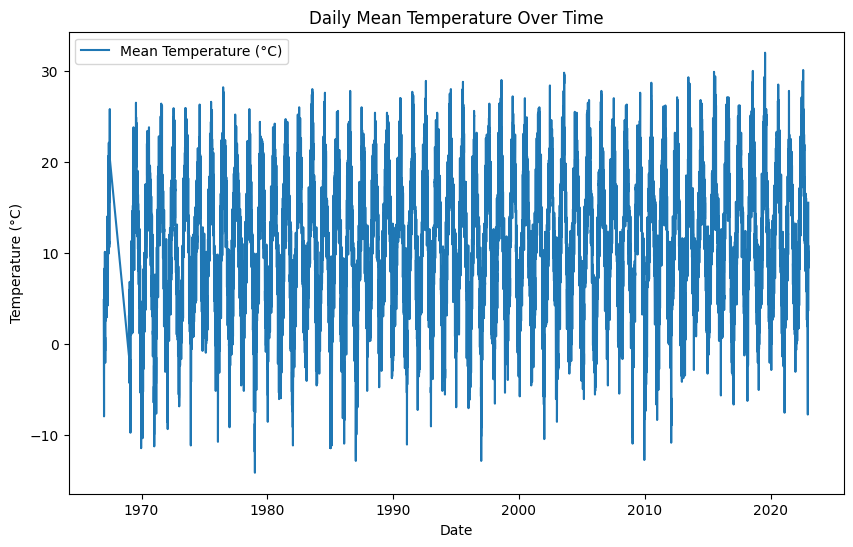

In [ ]:
# Plot the daily mean temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data['MESS_DATUM'], data['TMK'], label='Mean Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperature Over Time')
plt.legend()
plt.show()

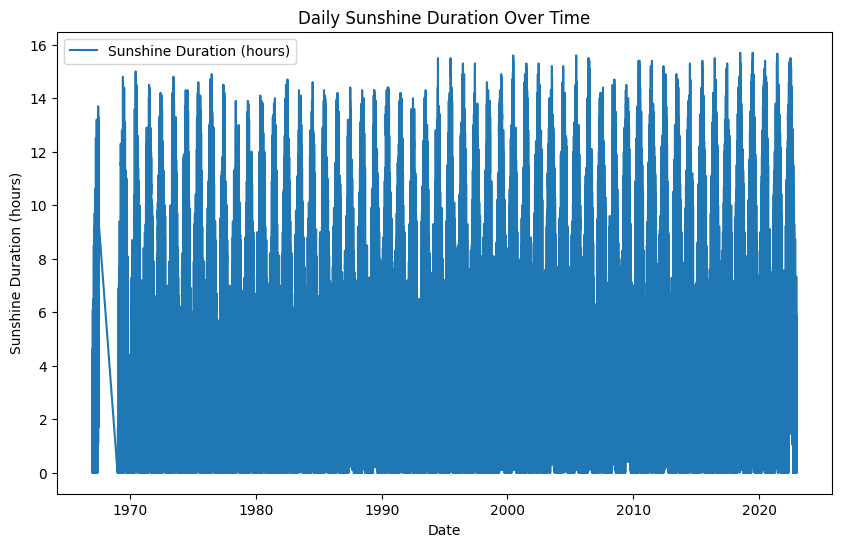

In [ ]:
# Line plot of sunshine duration over time
plt.figure(figsize=(10, 6))
plt.plot(data['MESS_DATUM'], data['SDK'], label='Sunshine Duration (hours)')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration (hours)')
plt.title('Daily Sunshine Duration Over Time')
plt.legend()
plt.show()


In [ ]:
clean_dataset = data

# **Exercise 3.d**

In [ ]:
my_dataset = clean[my_dataset != -999]
my_dataset

,STATIONS_ID,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
0,1420,19490101,-999.0,-999.0,4.3,1,-999.000,0,8.0,6.3,977.20,6.6,65.00,9.2,1.5,1.0
1,1420,19490102,-999.0,-999.0,2.3,1,-999.000,0,8.0,6.9,981.80,2.4,94.00,7.1,0.5,2.2
2,1420,19490103,-999.0,-999.0,0.1,1,-999.000,0,5.0,6.4,993.10,2.0,88.00,5.0,0.1,-0.3
3,1420,19490104,-999.0,-999.0,0.0,1,-999.000,0,6.7,5.6,1000.40,2.4,78.00,3.7,-1.6,-3.4
4,1420,19490105,-999.0,-999.0,0.0,1,-999.000,0,8.0,6.7,1011.20,3.5,86.00,5.3,1.6,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1420,20221227,9.4,4.0,0.0,6,5.867,0,4.1,6.7,1014.68,3.6,85.17,6.9,-1.5,-3.4
27024,1420,20221228,-999.0,5.5,0.0,6,0.000,0,7.9,7.9,1004.46,6.9,79.29,10.3,2.3,0.6
27025,1420,20221229,20.1,8.2,4.1,6,0.400,0,7.8,9.6,997.41,10.8,74.13,12.5,6.3,2.0
27026,1420,20221230,13.4,4.9,1.1,6,2.117,0,6.4,9.3,999.98,8.3,84.54,13.4,4.0,0.2


PART I

In [ ]:
#redundant, remove this
clean_dataset = data

sunshine_duration = clean_dataset['SDK']

# remove after cleaning is done
sunshine_duration = clean_dataset[clean_dataset.SDK != -999].SDK
#

A = sunshine_duration.shift(1).values.reshape(sunshine_duration.size,1)[1:]  # reshape array to make matrix
b = sunshine_duration.values[1:]
coef = least_squares_qr(A, b)[0]
print(coef)
last_day = sunshine_duration.iloc[-1]
next_day = coef * last_day

print("Last day's sunshine duration in hrs: ", last_day)
print("Tomorrow's sunshine duration in hrs: ", next_day)

0.8089893160238972
Last day's sunshine duration in hrs:  2.833
Tomorrow's sunshine duration in hrs:  2.291866732295701


PART II

Atmospheric Pressure vs. Sunshine Duration

In [ ]:
# remove this after cleaning is done
my_dataset = my_dataset[my_dataset != -999]
atm_pressure= my_dataset['PM']
A = atm_pressure.shift(1).values.reshape(atm_pressure.size,1)[1:]  # reshape array to make matrix
b = sunshine_duration.values[1:]

coef = least_squares_qr(A, b)[0]
print(coef)

last_day = sunshine_duration.iloc[-1]
next_day = coef * last_day

print("Last day's sunshine duration in hrs: ", last_day)
print("Tomorrow's sunshine duration in hrs: ", next_day)

[[141428.04195535]]
0.004580159208943934
Last day's sunshine duration in hrs:  2.833
Tomorrow's sunshine duration in hrs:  0.012975591038938165


Comapring Part I and II

In [ ]:
# can't do now, wait for cleaning

Comparing Part II and Part II

In [ ]:
# can't do now, wait for cleaning

Part III

In [ ]:
# remove this after cleaning is done
my_dataset = my_dataset[my_dataset != -999]

A = my_dataset.shift(1).values[1:]
b = sunshine_duration.values[1:]

coef = least_squares_qr(A, b)[0]
print(coef)

last_day = sunshine_duration.iloc[-1]
next_day = coef * last_day

print("Last day's sunshine duration in hrs: ", last_day)
print("Tomorrow's sunshine duration in hrs: ", next_day)

<ipython-input-1-70af6de81301>:51: RuntimeWarning: divide by zero encountered in divide
  Sigma_inv = np.diag(1 / singular_values)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()